#Judul


**ANALISIS PREDIKTIF UNTUK MENGOPTIMALKAN ALOKASI BIAYA IKLAN AGAR MENDAPATKAN PENJUALAN MAKSIMAL**

#Overview:



Penelitian ini bertujuan untuk memaksimalkan penjualan produk dengan mengoptimalkan alokasi biaya iklan melalui pendekatan data science. Melalui analisis mendalam terhadap data, kami akan mengeksplorasi berbagai faktor yang mempengaruhi penjualan dalam kampanye periklanan. Dengan menggunakan teknik analisis data, seperti mencari koefisien antar variable yang relevan untuk mengembangkan strategi alokasi dana yang cerdas dan efektif. Hasil dari penelitian ini diharapkan dapat memberikan panduan praktis bagi perusahaan dalam mengatur alokasi dana iklan secara optimal guna mencapai penjualan maksimal dalam anggaran yang tersedia.





#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST & ANALYST/DIBIMBING.ID/DATASET/Advertising_Data.csv')

Berikut adalah penjelasan singkat untuk setiap kolom:

1. TV: Biaya periklanan yang dihabiskan untuk iklan di televisi.
2. Billboards: Biaya periklanan yang dihabiskan untuk iklan di papan reklame.
3. Google_Ads: Biaya periklanan yang dihabiskan untuk iklan melalui Google Ads.
4. Social_Media: Biaya periklanan yang dihabiskan untuk iklan di platform media sosial.
5. Influencer_Marketing: Biaya periklanan yang dihabiskan untuk kampanye pemasaran influencer.
6. Affiliate_Marketing: Biaya periklanan yang dihabiskan untuk program pemasaran afiliasi.
7. Product_Sold: Jumlah produk yang terjual.

#Preliminary Look and Data Cleansing

##Sample Data

In [ ]:
#5 baris data pertama
df.head(5)

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.00
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.00
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.00
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.00
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.00


keterangan:
1. semua kolom berisi numeric
2. nama kolom dan isinya terlihat bagus

## Informasi Umum, duplicated data, & Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


keterangan
1. semua kolom bertype float
2. ada 7 kolom dan 300 baris
3. tidak terdeteksi missing value dari jumlah masing-masing baris

###Cek Missing Values

In [ ]:
df.isna().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

tidak ada missing values, good !

###Cek Duplicate Data

In [ ]:
df.duplicated().sum()

0

tidak ada duplicate data, good !

#Data Understanding

In [ ]:
#group data
features = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing','Product_Sold']

In [ ]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00
mean,517.43,502.64,512.44,489.80,465.73,484.43,7031.52
std,288.11,275.84,285.42,273.88,288.31,277.96,1703.61
min,1.04,3.63,14.86,11.69,0.77,6.74,2259.00
25%,273.09,277.91,250.53,265.61,214.48,267.68,5922.50
50%,513.97,533.02,528.96,486.38,480.36,451.31,7051.00
75%,774.28,745.00,763.35,695.12,703.09,721.07,8278.00
max,998.10,995.32,999.23,996.16,999.83,987.58,12227.00


In [ ]:
#cek nilai unik pada setiap feature
for col in features:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of TV column
36.04     2
281.42    1
328.11    1
383.98    1
188.82    1
         ..
283.57    1
679.14    1
540.69    1
788.17    1
476.45    1
Name: TV, Length: 299, dtype: int64 

Value counts of Billboards column
538.80    1
493.10    1
654.54    1
129.27    1
487.18    1
         ..
358.42    1
447.24    1
326.95    1
825.42    1
884.77    1
Name: Billboards, Length: 300, dtype: int64 

Value counts of Google_Ads column
565.10    2
694.24    2
533.72    1
230.43    1
922.77    1
         ..
213.66    1
395.30    1
362.71    1
912.89    1
301.79    1
Name: Google_Ads, Length: 298, dtype: int64 

Value counts of Social_Media column
349.30    1
579.99    1
651.29    1
464.89    1
18.49     1
         ..
29.11     1
421.19    1
597.94    1
235.03    1
802.30    1
Name: Social_Media, Length: 300, dtype: int64 

Value counts of Influencer_Marketing column
242.77    1
491.61    1
415.85    1
389.11    1
510.91    1
         ..
622.68    1
565.18    1
255.60    1
938.70    1


In [ ]:
df['Product_Sold'].value_counts().head(15)

7455.00    2
7737.00    2
8366.00    2
5957.00    2
6667.00    2
6356.00    2
7236.00    2
7383.00    2
6026.00    2
5235.00    2
8724.00    2
8744.00    2
7585.00    1
5279.00    1
6595.00    1
Name: Product_Sold, dtype: int64

keterangan
1. tidak ada nilai biaya yg sama pada setiap feature iklan, kecuali tv ada 1 dan google_ads ada 2. mengartikan bahwa setiap melakukan iklan dengan biaya yang berbeda
2. ada 12 nilai product_sold yg sama dari iklan yang dijalankan

#Exploratory Data Analyst (EDA)

##Univariate Analysis

###Boxplot

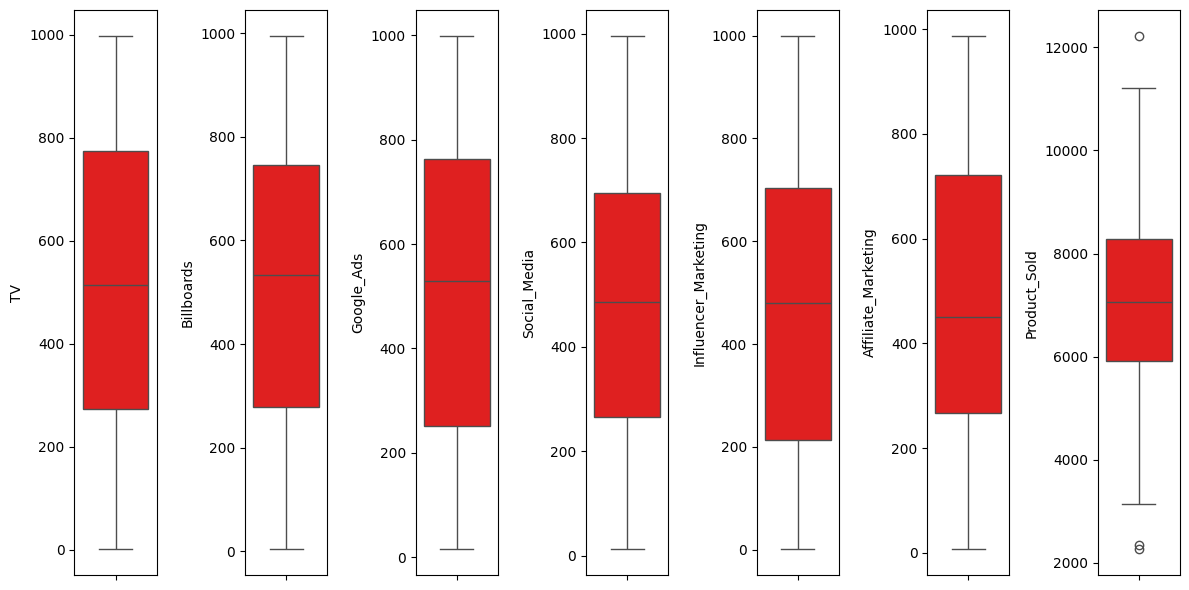

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

In [ ]:
#cek data outlier
Q1 = df['Product_Sold'].quantile(0.25)
Q3 = df['Product_Sold'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Product_Sold']<lower_bound) | (df['Product_Sold'] > upper_bound)]

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
11,787.33,947.73,884.15,992.30,871.55,742.36,12227.00
145,1.04,19.68,900.71,55.67,379.03,63.10,2259.00
281,480.67,135.75,82.66,217.72,217.90,15.41,2353.00


terdeteksi ada outlier di Product_Sold , namun tidak perlu di drop

###KDE Plot

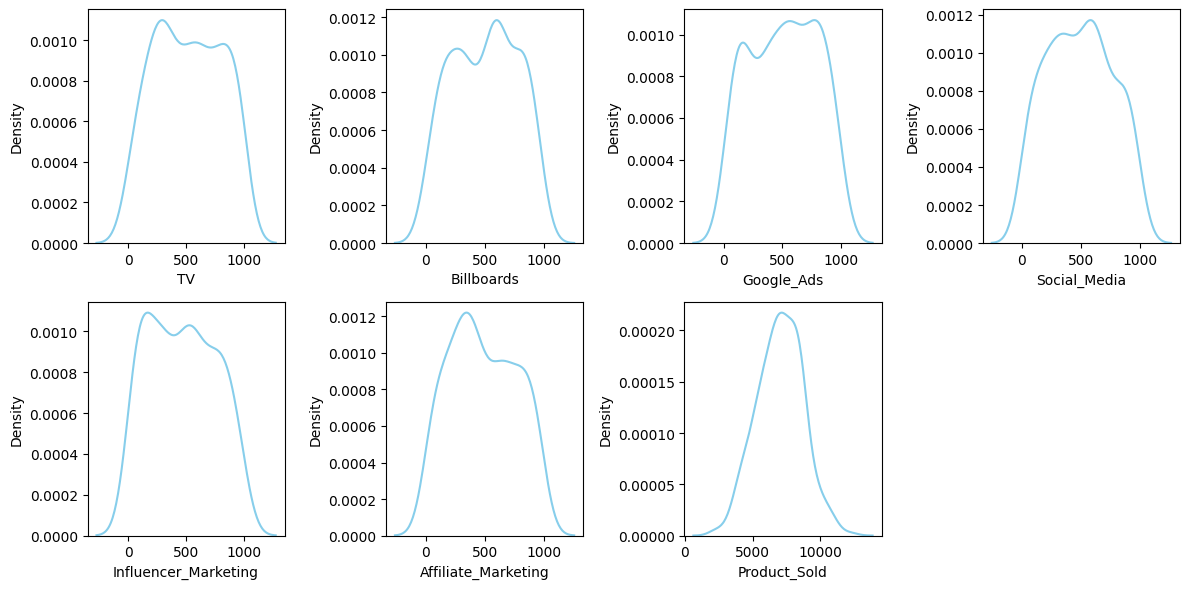

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

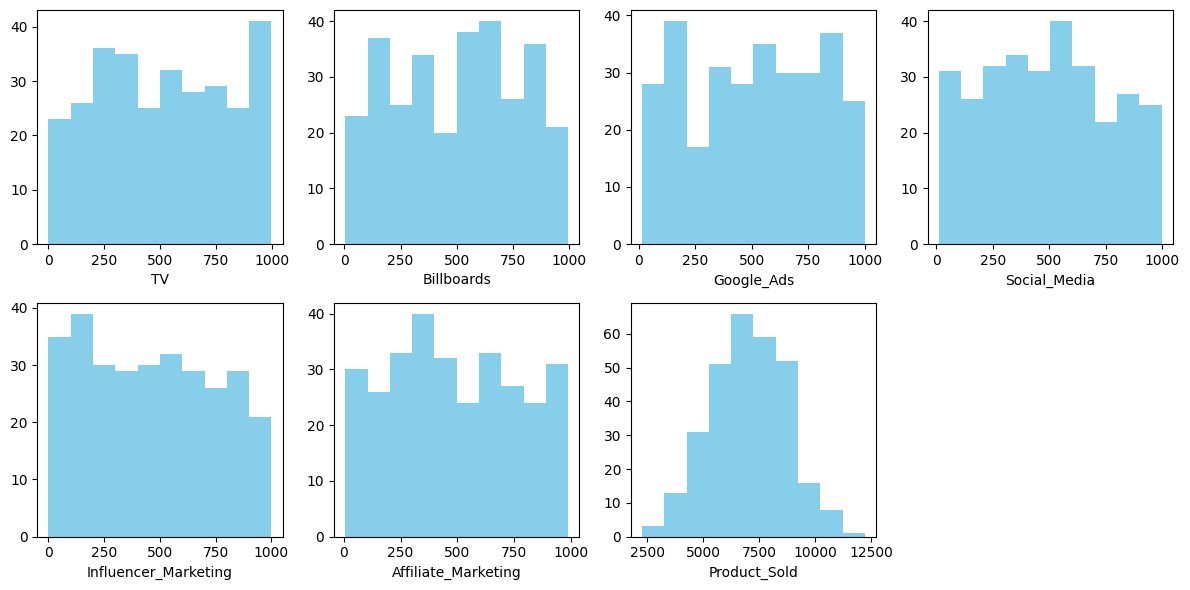

In [ ]:
# Mengatur ukuran figur untuk pembacaan yang lebih baik
plt.figure(figsize=(12, 6))

# Iterasi melalui setiap fitur dan menampilkan histogram
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    plt.hist(df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

# Menampilkan histogram untuk setiap fitur dalam bentuk subplot
plt.show()

##Bivariate Analysis

In [ ]:
#cek kembali dataset
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.00
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.00
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.00
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.00
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.00


###Scatter PLot

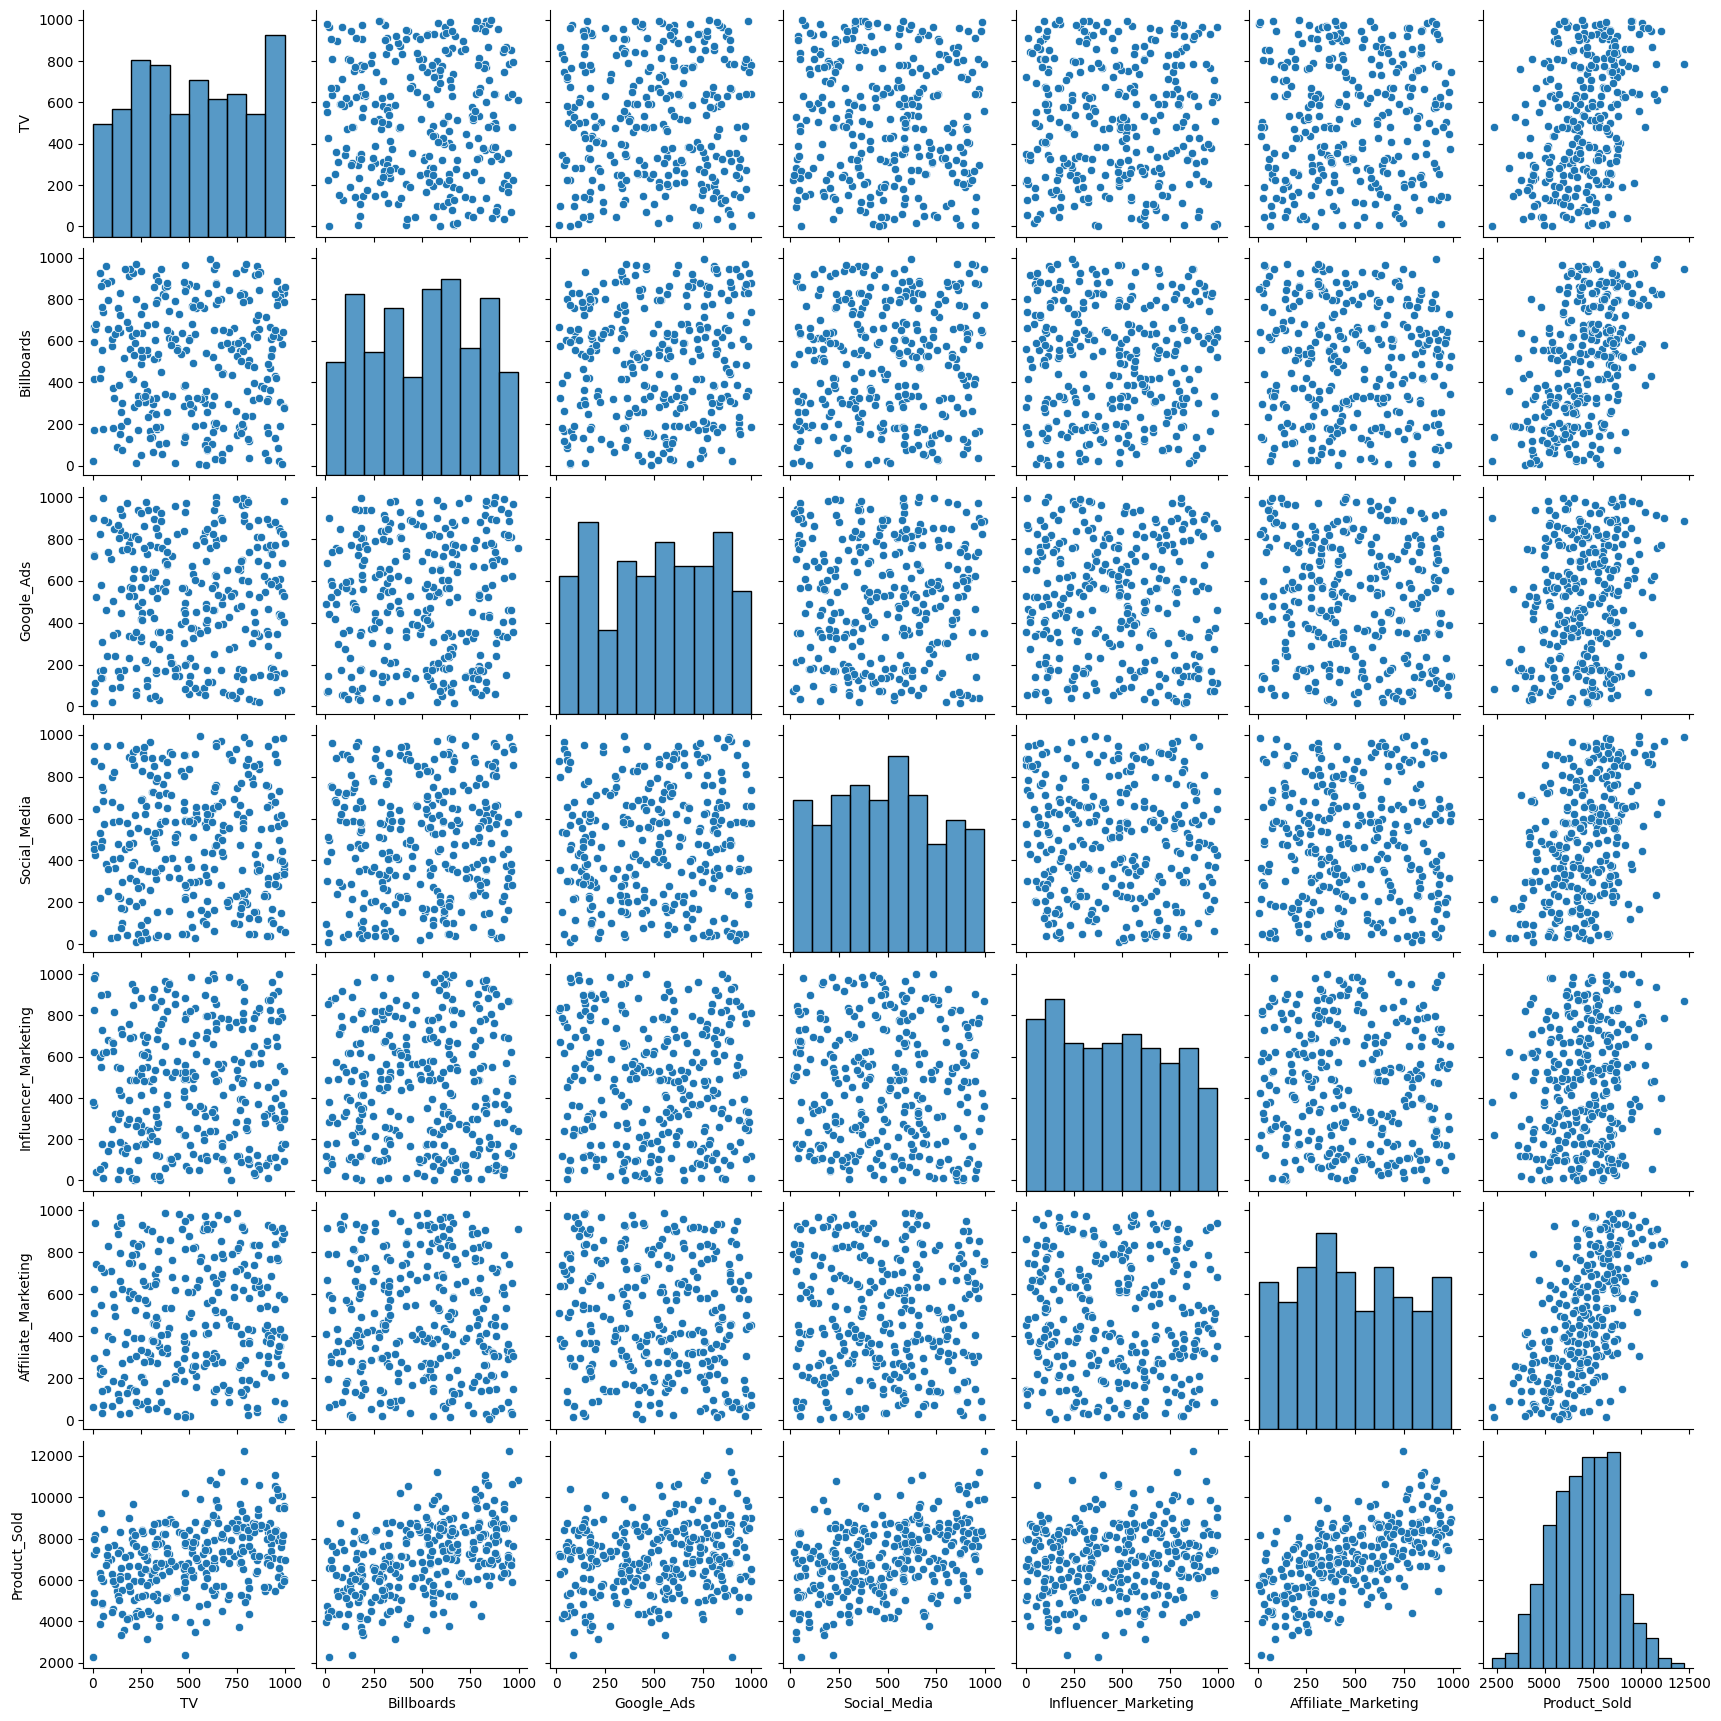

In [ ]:
# Visualisasi hubungan antar variabel numerik menggunakan pair plot
sns.pairplot(df)
plt.show()

###Heatmap

Text(0.5, 1.0, 'Matriks Korelasi Antar Variabel')

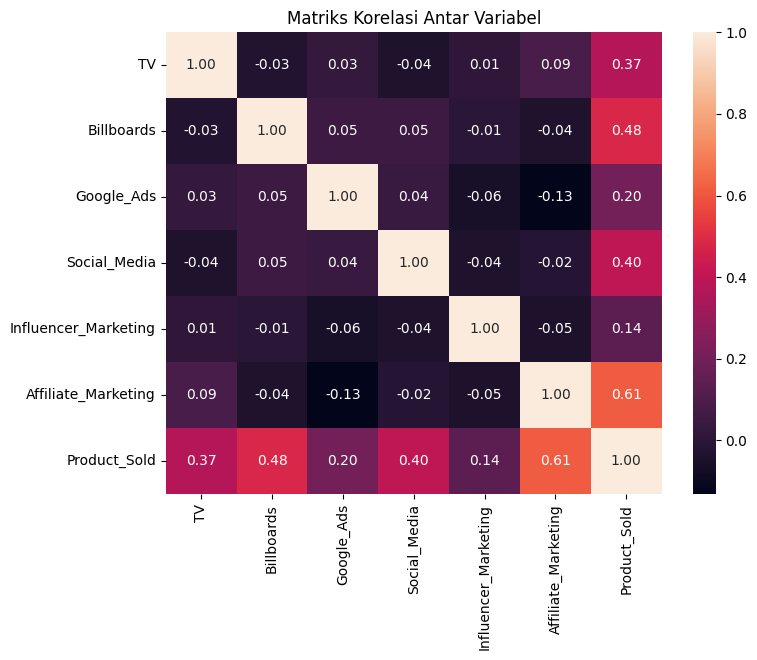

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')

#Machine Learning Linear Regression

##Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = df[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]
y = df['Product_Sold']

# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##Model Training

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Model Diagnostic

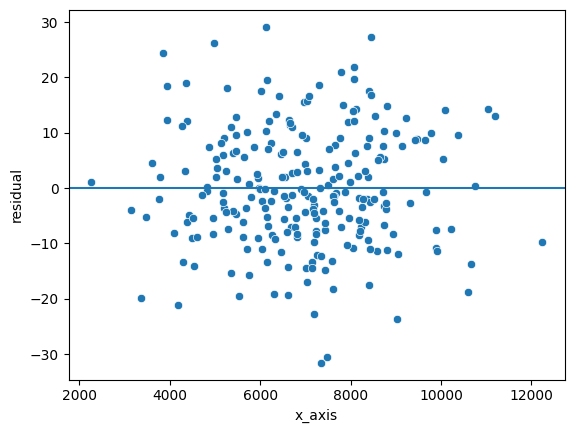

In [ ]:
# calculate residuals
y_pred = model.predict(X_train)
residual = y_train - y_pred

df_resid = pd.DataFrame({
    'x_axis': y_pred,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


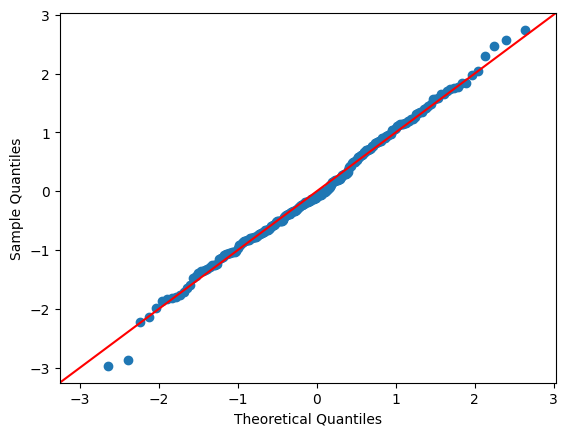

In [ ]:
# QQplot
std_resid = StandardScaler().fit_transform(np.array(residual).reshape(-1, 1)).flatten()

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

##Evaluasi

###Training Error

In [ ]:
r_squared = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred, squared=False)
rme = (mae / y_train.mean()) * 100  # Dalam persen

metrics_data = {
    'Metrics': ['R_Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'Relative Mean Error'],
    'Values': [r_squared, mse, mae, rmse, rme]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metrics,Values
0,R_Squared Error,1.00
1,Mean Squared Error,113.05
2,Mean Absolute Error,8.53
3,Root Mean Squared Error,10.63
4,Relative Mean Error,0.12


###Test Error

In [ ]:
y_pred_test = model.predict(X_test)

r_squared = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rme = (mae / y_test.mean()) * 100  # Dalam persen

metrics_data = {
    'Metrics': ['R_Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'Relative Mean Error'],
    'Values': [r_squared, mse, mae, rmse, rme]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metrics,Values
0,R_Squared Error,1.00
1,Mean Squared Error,75.37
2,Mean Absolute Error,7.09
3,Root Mean Squared Error,8.68
4,Relative Mean Error,0.10


evaluasi menunjukan nilai cukup rendah, mengartikan model berkerja dengan baik

#EDA Questions

In [ ]:
#cek data
df

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.00
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.00
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.00
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.00
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.00
...,...,...,...,...,...,...,...
295,770.05,501.36,694.60,172.26,572.26,410.56,6851.00
296,512.38,250.83,373.78,366.95,987.14,509.03,6477.00
297,998.10,858.75,781.06,60.61,174.63,213.53,6949.00
298,322.35,681.22,640.29,343.65,534.22,648.71,7737.00


##1. fitur apa dengan jumlah biaya paling besar?



In [ ]:
total_ads = df.sum()
total_ads = pd.DataFrame(total_ads)
total_ads = total_ads.transpose()
total_ads = total_ads.drop(columns=['Product_Sold'])
total_ads

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,155229.30,150793.48,153733.24,146940.03,139719.77,145329.19


visualisasinya:

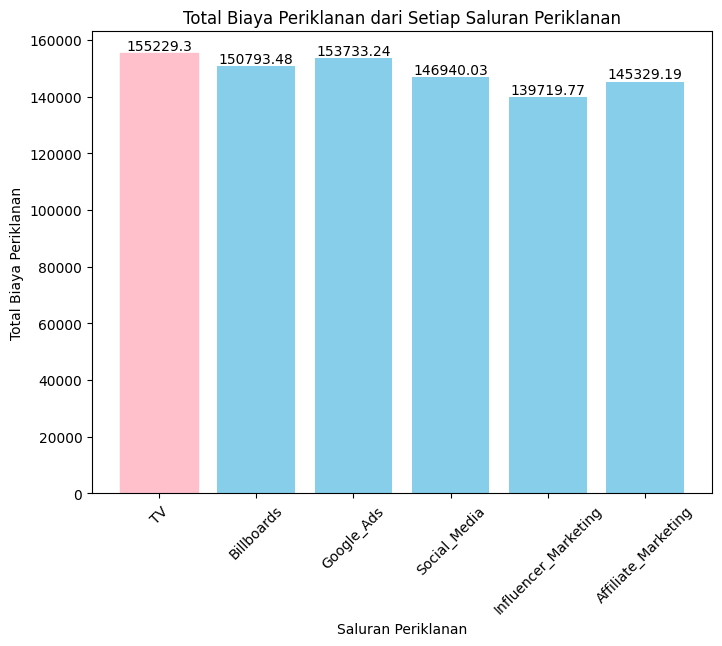

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
bars = plt.bar(total_ads.columns, total_ads.values[0], color='skyblue')
plt.xlabel('Saluran Periklanan')
plt.ylabel('Total Biaya Periklanan')
plt.title('Total Biaya Periklanan dari Setiap Saluran Periklanan')
plt.xticks(rotation=45)

# Menentukan nilai maksimum dari total biaya periklanan
max_value = max(total_ads.values[0])

# Memberi warna berbeda untuk bar dengan nilai maksimum
for bar in bars:
    if bar.get_height() == max_value:
        bar.set_color('pink')

    # Menambahkan label pada setiap bar
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             round(bar.get_height(), 2),
             ha='center',
             va='bottom')

plt.show()


fitur dengan jumlah biaya paling besar adalah TV sebesar 155229.30

##2. Fitur Apa dengan Jumlah Biaya Paling Kecil?

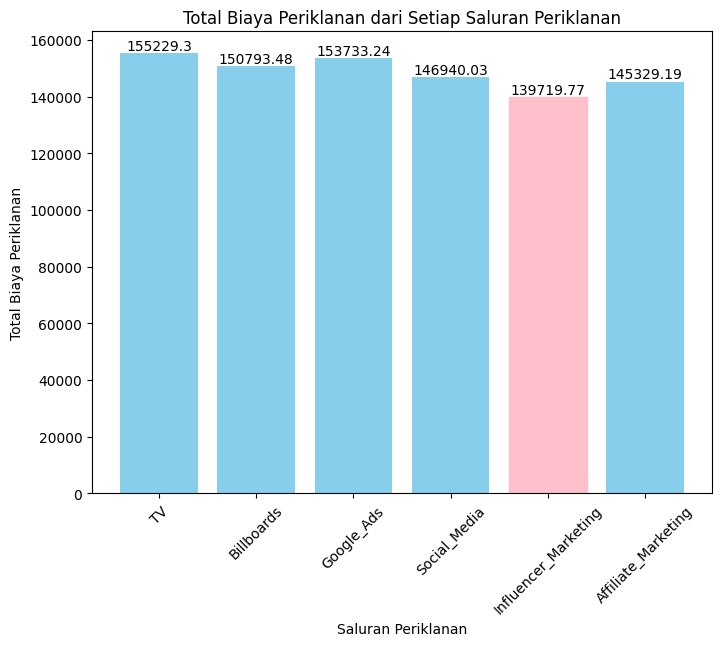

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
bars = plt.bar(total_ads.columns, total_ads.values[0], color='skyblue')
plt.xlabel('Saluran Periklanan')
plt.ylabel('Total Biaya Periklanan')
plt.title('Total Biaya Periklanan dari Setiap Saluran Periklanan')
plt.xticks(rotation=45)

# Menentukan nilai maksimum dari total biaya periklanan
min_value = min(total_ads.values[0])

# Memberi warna berbeda untuk bar dengan nilai maksimum
for bar in bars:
    if bar.get_height() == min_value:
        bar.set_color('pink')

    # Menambahkan label pada setiap bar
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             round(bar.get_height(), 2),
             ha='center',
             va='bottom')

plt.show()


fitur dengan jumlah biaya paling kecil adalah influencer_marketing sebesar 139719.77

##3. Top 5 total biaya ads dan berapa penjualan product nya?

In [ ]:
# Menghitung total biaya periklanan dari setiap saluran periklanan
total_ad_costs = df[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']].sum(axis=1)
df_concatenated = pd.concat([total_ad_costs.rename('Total_Ad_Costs'), df['Product_Sold']], axis=1)

df_concatenated_dsc = df_concatenated.sort_values(by='Total_Ad_Costs', ascending=False)
df_concatenated_dsc = df_concatenated_dsc.head(5)
df_concatenated_dsc

,Total_Ad_Costs,Product_Sold
11,5225.42,12227.00
10,4756.00,11210.00
96,4607.78,10763.00
165,4519.85,9498.00
147,4514.45,9889.00


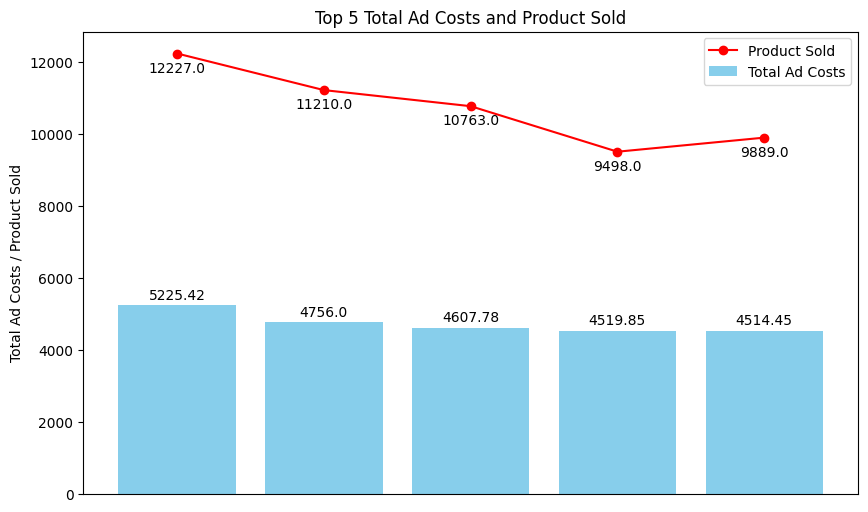

In [ ]:
plt.figure(figsize=(10, 6))

# Bar chart untuk Total_Ad_Costs
plt.bar(range(len(df_concatenated_dsc)), df_concatenated_dsc['Total_Ad_Costs'], color='skyblue', label='Total Ad Costs')
for i, cost in enumerate(df_concatenated_dsc['Total_Ad_Costs']):
    plt.text(i, cost + 100, str(round(cost, 2)), ha='center', va='bottom')

# Line chart untuk Product_Sold
plt.plot(range(len(df_concatenated_dsc)), df_concatenated_dsc['Product_Sold'], marker='o', color='red', label='Product Sold')
for i, sold in enumerate(df_concatenated_dsc['Product_Sold']):
    plt.text(i, sold - 200, str(round(sold, 2)), ha='center', va='top')

plt.ylabel('Total Ad Costs / Product Sold')
plt.title('Top 5 Total Ad Costs and Product Sold')
plt.legend()
plt.xticks([])
plt.grid(False)
plt.show()


Total Biaya ads terbesar 5225.42 dan jumlah penjualan produknya 12227.0

##4. bottom 5 total biaya ads dan berapa penjualan product nya?

In [ ]:
df_concatenated_asc = df_concatenated.sort_values(by='Total_Ad_Costs', ascending=True)
df_concatenated_asc = df_concatenated_asc.head(5)
df_concatenated_asc

,Total_Ad_Costs,Product_Sold
281,1150.11,2353.00
36,1401.34,3600.00
145,1419.23,2259.00
171,1532.57,4279.00
78,1560.15,4151.00


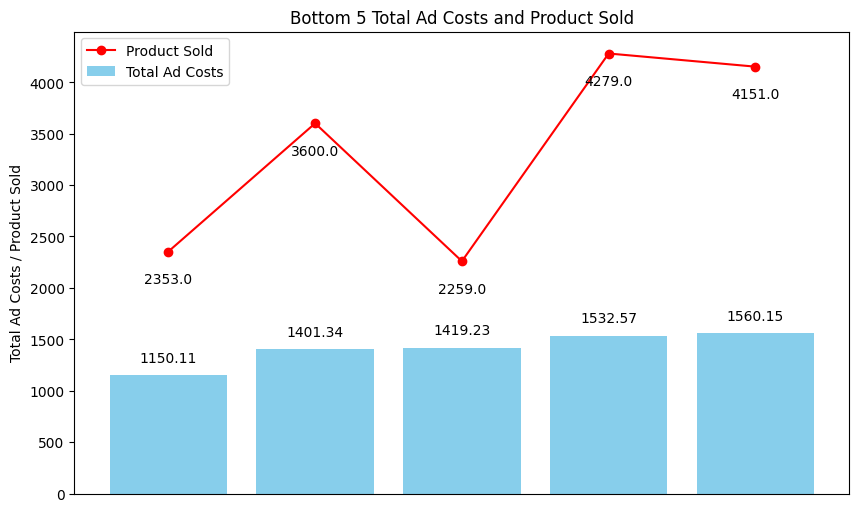

In [ ]:
plt.figure(figsize=(10, 6))

# Bar chart untuk Total_Ad_Costs
plt.bar(range(len(df_concatenated_asc)), df_concatenated_asc['Total_Ad_Costs'], color='skyblue', label='Total Ad Costs')
for i, cost in enumerate(df_concatenated_asc['Total_Ad_Costs']):
    plt.text(i, cost + 100, str(round(cost, 2)), ha='center', va='bottom')

# Line chart untuk Product_Sold
plt.plot(range(len(df_concatenated_asc)), df_concatenated_asc['Product_Sold'], marker='o', color='red', label='Product Sold')
for i, sold in enumerate(df_concatenated_asc['Product_Sold']):
    plt.text(i, sold - 200, str(round(sold, 2)), ha='center', va='top')

plt.ylabel('Total Ad Costs / Product Sold')
plt.title('Bottom 5 Total Ad Costs and Product Sold')
plt.legend()
plt.xticks([])
plt.grid(False)
plt.show()


Total Biaya ads terbesar 1150.11 dan jumlah penjualan produknya 2353.0

##5. Bagaimana hubungan total biaya saluran periklanan mempengaruhi penjualan produk?

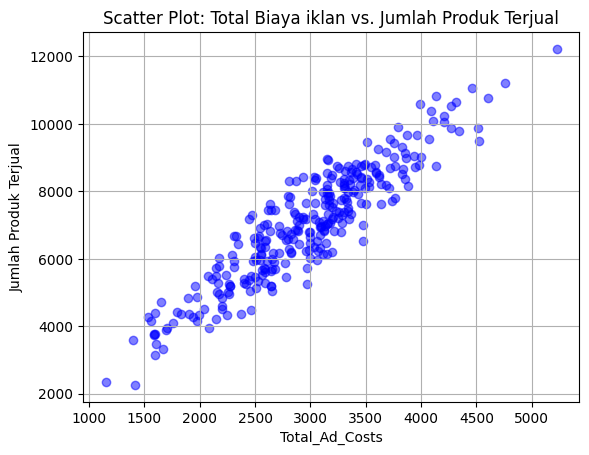

In [ ]:
# Membuat scatter plot
plt.scatter(df_concatenated['Total_Ad_Costs'], df_concatenated['Product_Sold'], color='blue', alpha=0.5)
plt.xlabel('Total_Ad_Costs')
plt.ylabel('Jumlah Produk Terjual')
plt.title('Scatter Plot: Total Biaya iklan vs. Jumlah Produk Terjual')
plt.grid(True)
plt.show()

dari visualisasi yang terlihat, hubungan total biaya saluran periklanan mempengaruhi penjualan produk. semakin besar biaya , semakin besar produk yang terjual

##6. Saluran periklanan mana yang memberikan kontribusi terbesar terhadap penjualan produk?

In [ ]:
fitur_importance = model.coef_

df_coef = pd.DataFrame({'Fitur': X.columns, 'Koefisien': fitur_importance})
df_coef_max = df_coef.style.apply(lambda x: ['background: pink' if x['Koefisien'] == df_coef['Koefisien'].max() else '' for i in x], axis=1)
df_coef_max


,Fitur,Koefisien
0,TV,575.792808
1,Billboards,825.742566
2,Google_Ads,426.869826
3,Social_Media,683.512159
4,Influencer_Marketing,345.301761
5,Affiliate_Marketing,1109.030676


saluran periklanan dengan kontribusi paling besar adalah Affiliate_Marketing: 3.996625


##7. Saluran periklanan mana yang memberikan kontribusi terkecil terhadap penjualan produk?

In [ ]:
df_coef = pd.DataFrame({'Fitur': X.columns, 'Koefisien': fitur_importance})
df_coef_max = df_coef.style.apply(lambda x: ['background: pink' if x['Koefisien'] == df_coef['Koefisien'].min() else '' for i in x], axis=1)
df_coef_max


,Fitur,Koefisien
0,TV,575.792808
1,Billboards,825.742566
2,Google_Ads,426.869826
3,Social_Media,683.512159
4,Influencer_Marketing,345.301761
5,Affiliate_Marketing,1109.030676


saluran periklanan dengan kontribusi paling kecil adalah Influencer_Marketing: 1.199659

##8. Apakah alokasi biaya iklan sudah efektif?

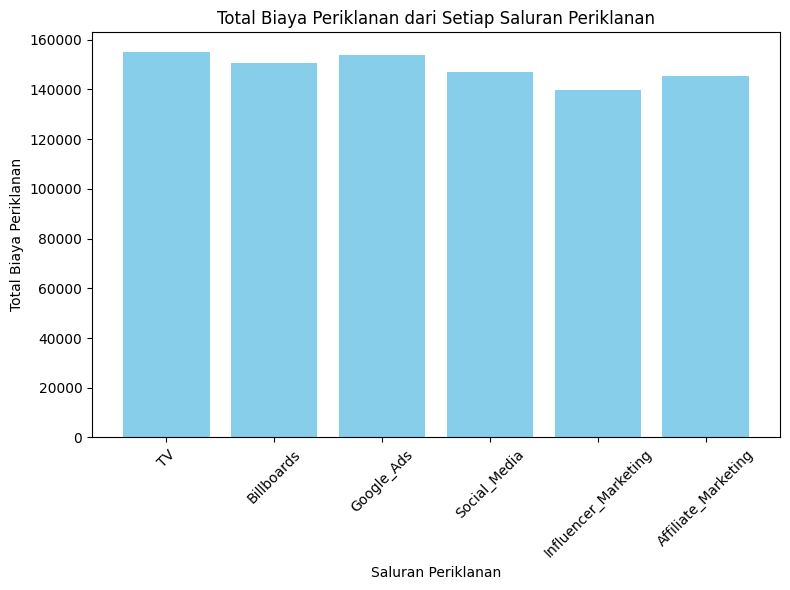

In [ ]:
# Membuat plot
plt.figure(figsize=(8, 6))
plt.bar(total_ads.columns.to_list(), total_ads.values[0], color='skyblue')

plt.xlabel('Saluran Periklanan')
plt.ylabel('Total Biaya Periklanan')
plt.title('Total Biaya Periklanan dari Setiap Saluran Periklanan')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

dari data yang ada, alokasi biaya yang dikeluarkan relatif hampir merata, padahal secara coefision setiap fitur berbeda. jawabannya ya, alokasi dana tidak efektif

##9. Apakah bisa mengoptimalkan alokasi biaya iklan agar lebih efektif?

###total biaya periklanan pada setiap fitur sebelum di sesuaikan dengan coef nya

In [ ]:
total_ads

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,155229.30,150793.48,153733.24,146940.03,139719.77,145329.19


###total biaya periklanan pada setiap fitur setelah di sesuaikan dengan coef nya

In [ ]:
total_ads.sum().sum()

891745.01

In [ ]:
# Total biaya iklan yang tersedia
total_biaya = 891745.01

total_importance = df_coef['Koefisien'].sum()
biaya_per_fitur = {fitur: total_biaya * (koefisien / total_importance) for fitur, koefisien in zip(df_coef['Fitur'], df_coef['Koefisien'])}
total_ads_new = pd.DataFrame([biaya_per_fitur])
total_ads_new


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,129457.39,185654.42,95974.55,153676.29,77635.33,249347.02


visualisasinya:

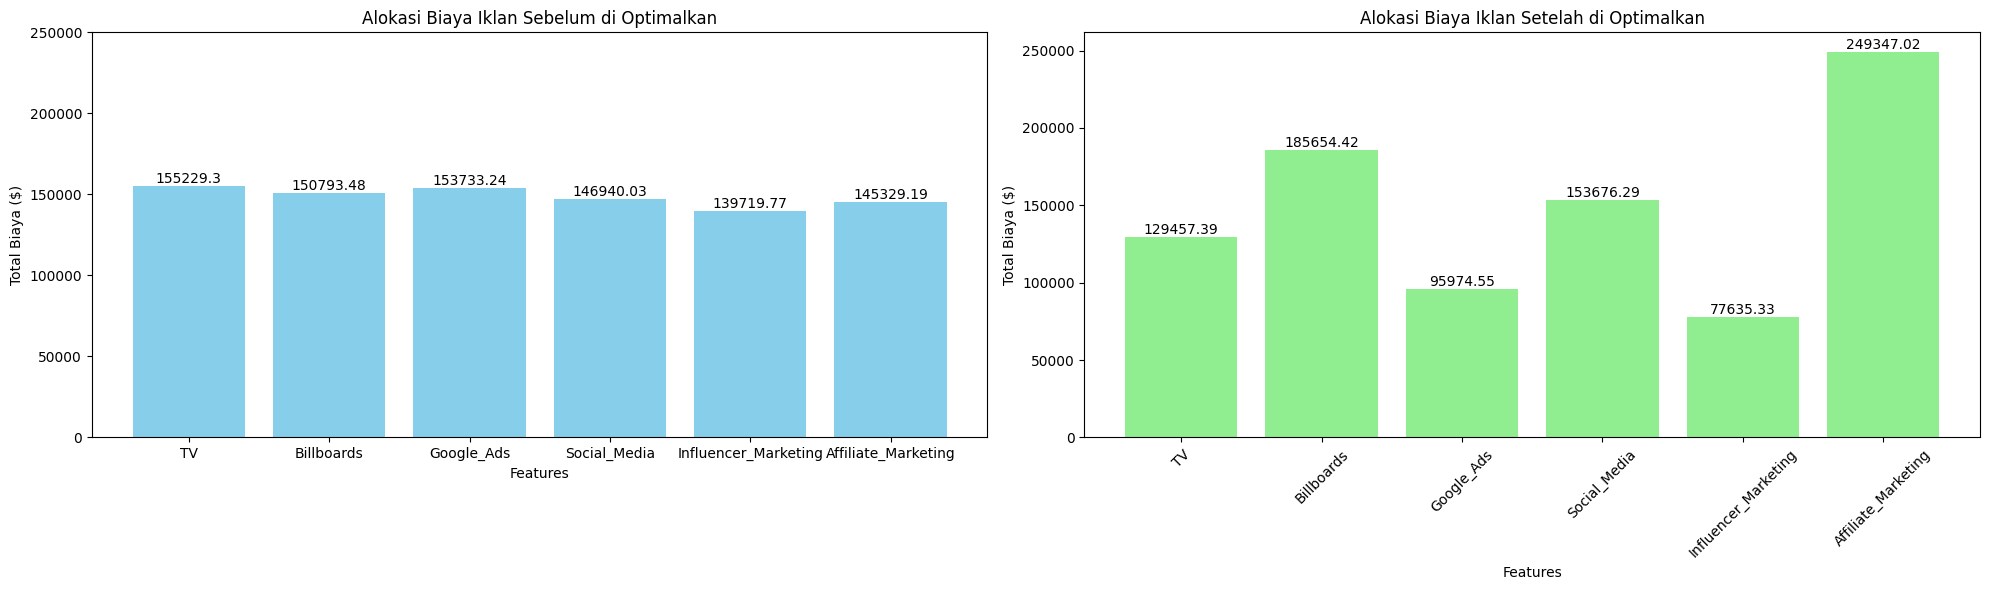

In [ ]:
import matplotlib.pyplot as plt

# Ukuran figure
plt.figure(figsize=(20, 6))

# Plot pertama
plt.subplot(1, 2, 1)
bars1 = plt.bar(total_ads.columns.to_list(), total_ads.values[0], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Total Biaya ($)')
plt.title('Alokasi Biaya Iklan Sebelum di Optimalkan')

# Menambahkan label pada setiap bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

plt.ylim(0, 250000)

# Plot kedua
plt.subplot(1, 2, 2)
bars2 = plt.bar(total_ads_new.columns.to_list(), total_ads_new.values[0], color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Total Biaya ($)')
plt.title('Alokasi Biaya Iklan Setelah di Optimalkan')

# Menambahkan label pada setiap bar
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


terlihat alokasi biaya menjadi lebih efektif sesuai dengan pengaruh fitur terhadap penjualan dengan biaya yang sama

##10. Berapa persen kenaikan / Penurunan penjualan setelah mengoptimalkan alokasi biaya?

In [ ]:
# Hasil prediksi sebelum di optimalkan
hasil_sebelum_optimasi = model.predict(scaler.transform(total_ads))

# Hasil prediksi setelah di optimalkan
hasil_setelah_optimasi = model.predict(scaler.transform(total_ads_new))

selisih = hasil_setelah_optimasi - hasil_sebelum_optimasi
persentase_selisih = (selisih / hasil_sebelum_optimasi) * 100
pd.options.display.float_format = '{:.2f}'.format

df_hasil_prediksi = pd.DataFrame({
    'Keterangan': ['Prediksi Sebelum Optimasi', 'Prediksi Setelah Optimasi', 'Selisih', 'Persentase Kenaikan/Penurunan'],
    'Nilai': [hasil_sebelum_optimasi[0], hasil_setelah_optimasi[0], selisih[0], persentase_selisih[0]]
})
df_hasil_prediksi


,Keterangan,Nilai
0,Prediksi Sebelum Optimasi,2108968.07
1,Prediksi Setelah Optimasi,2433461.66
2,Selisih,324493.58
3,Persentase Kenaikan/Penurunan,15.39


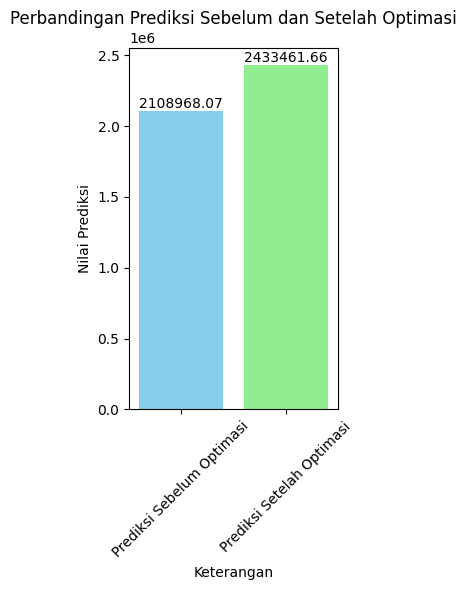

In [ ]:
keterangan = ['Prediksi Sebelum Optimasi', 'Prediksi Setelah Optimasi']
nilai = [2108968.07, 2433461.66]

# Plot
plt.figure(figsize=(3, 6))
plt.bar(keterangan, nilai, color=['skyblue', 'lightgreen'])
plt.xlabel('Keterangan')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Prediksi Sebelum dan Setelah Optimasi')
plt.xticks(rotation=45)
plt.tight_layout()

# Tambahkan label nilai di atas bar
for i in range(len(keterangan)):
    plt.text(i, nilai[i], str(nilai[i]), ha='center', va='bottom')

# Tampilkan plot
plt.show()



terjadi kenaikan penjualan produk sebesar 324493.58 dengan presentase 15% setelah mengoptimalkan alokasi biaya iklan.
